# Dimensionality Reduction and Clustering

I will focus my Dimensionality Reduction and Clustering on the Mnist data set from sklearn.datasets. This data consists of photos of hand drawn digits ranging from 0-9. I will make efforts to catorgerize these numbers appropriately without labels. 

In [1]:
#download the proper packages

#basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

#packages to run PCA
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA

#Packages to run TSNE
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np

#Packages for Kmeans
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import homogeneity_score

#Packages to run dendogram
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle

Load in the data

In [2]:
#import the mnist data set
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata("MNIST original")
#scaled data by dividing by 255
X = mnist.data / 255.0
#define the target
y = mnist.target

In [3]:
#check its shape
X.shape

(70000, 784)

# 1. Use PCA to reduce dementionality

# A. How many components did you use? Why?

There are a couple of different strategies when it comes to determining the number of components we want to use: 
1. The elbow method.
2. picking components based on how much of our variance we want explained

Text(0.5,1,'Elbow Method')

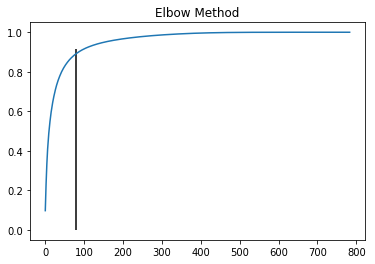

In [51]:
#finding the appropriate number of components with the elbow method
pca = PCA(n_components=784)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[100],x=80)
plt.title('Elbow Method')

So based on the elbow method we can see that 80 components would make a good choice.

Lets check how many components we would need to to explain 95% of our variance.

In [32]:
#explaining 95% of the variance
pca = PCA(n_components=.95)
X_2dim = pca.fit_transform(X)

In [33]:
#checking the modified shape
X_2dim.shape

(70000, 154)

I will use the second outlined method and use 154 components so that a majority of my variance can be explained.

# B. Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(0.5,1,'Two Component Scatter Plot')

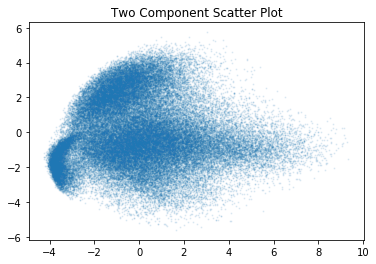

In [52]:
#Plotting the first two components of the data
plt.scatter(X_2dim[:, 0], X_2dim[:, 1], s=1, alpha=.1)
plt.title('Two Component Scatter Plot')

From this plot it is impossible to see any trends in the first two components and it is extremely difficult to interpret the graph. This does not come as a suprise however because we have reduced the demensionality of the data. 

# C. Why would you use PCA? What is it doing? And what are the drawbacks?

1. PCA is used because our data can increase in dementionality vary quickly with all of the features we use in our data. in high dimensions observations have a higher chance of being far away from eachother. PCA reduces demensionality while minimizing the amount of data lost in the process. 
2. PCA is a technique that projects our data onto the axes with the highest variance. It does that because it is the least amount of data lost.
3. Drawbacks include: Scale variant, mean and covariance doesn't describe some distributions, Relies on orthogonal tranformations, Relies on linear asumptions.

# D. Plot some of the images, then compress them using PCA and plot again. How does it look?

Text(0.5,1,'Zero')

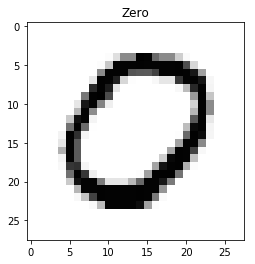

In [53]:
#plotting an image
plt.imshow(X[78].reshape((28,28)), cmap='Greys')
plt.title('Zero')

Text(0.5,1,'Three')

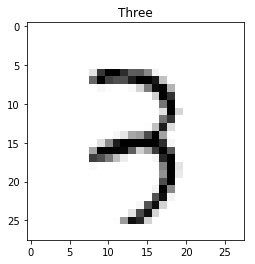

In [54]:
#plotting an image
plt.imshow(X[23000].reshape((28,28)), cmap='Greys')
plt.title('Three')

Now I will compress them with PCA and replot the "23000" image.

Text(0.5,1,'Compressed 3')

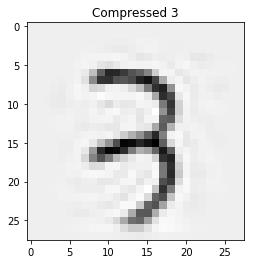

In [55]:
#compressing the image via PCA
pca =PCA(n_components=.95)
X_2dim = pca.fit_transform(X)
x_back_to_normal = pca.inverse_transform(X_2dim)

plt.imshow(x_back_to_normal[23000].reshape((28,28)), cmap='Greys') 
plt.title('Compressed 3')

Text(0.5,1,'Compressed 0')

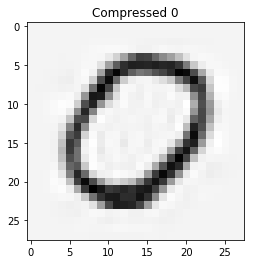

In [56]:
#compressing the image via PCA
pca =PCA(n_components=.95)
X_2dim = pca.fit_transform(X)
x_back_to_normal = pca.inverse_transform(X_2dim)

plt.imshow(x_back_to_normal[78].reshape((28,28)), cmap='Greys') 
plt.title('Compressed 0')

After compressing the image with PCA and "replotting" the image, the picture is blurred when comapred to the uncompressed version.

# 2. Use t-SNE to plot the first two components (you should probably random sample around 10000 points):

# A. How does this plot differ from your PCA plot?

The plot can be found at the bottom of this section of the Notebook and the differences in the two plots are monumental. In the first plot you couldn't even interpret the graph as it appeared points were scattered every which direction. In the T-SNE graph we can see clusters form and which are numbers the model struggles with such as diferentiating 9 and 4.

# B. How robust is it to changes in perplexity?

when changing perplexity the changes were robust. The graph would completely change its shape. 

In [11]:
#first reduce dimensionality before feeding to t-sne
pca = PCA(n_components=154)
X_pca = pca.fit_transform(X)

rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000

#run TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.036s...
[t-SNE] Computed neighbors for 10000 samples in 29.854s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.144982
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.398079
[t-SNE] Error after 1000 iterations: 1.738204


In [44]:
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.041s...
[t-SNE] Computed neighbors for 10000 samples in 25.944s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.571428
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.722038
[t-SNE] Error after 251 iterations: 179769313486231570814527423731704356798070

# C. How robust is it to different learning rate and number of iterations?

In [47]:
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500, learning_rate=2000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.043s...
[t-SNE] Computed neighbors for 10000 samples in 32.653s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.546287
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.399017
[t-SNE] Error after 500 iterations: 1.487422


When changing the learning rate and number of iterations the changes were much less robust. the changes were subtle. 

In [12]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5,1,'T-SNE Plot')

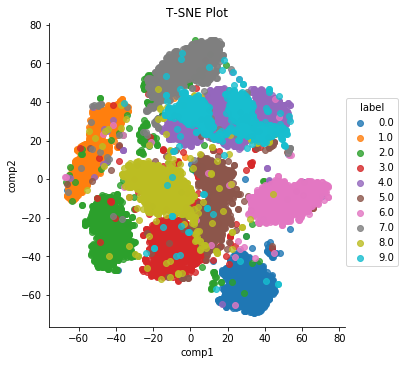

In [57]:
#plot TSNE
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE Plot')

explain TSNE

# 3. Perform k-means clustering:

# A. How did you choose k?

Because I am aware of range of the mnist data set. I used this information to select my "K". THe mnist data set ranges from 0-9, thus I chose 10 for my "K".

In [28]:
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=1)
kmeans.fit(X[:n_select,:])
sk_clusters = kmeans.predict(X[:n_select])

# B. How did you evaluate your clustering?

I validated my cluster by using the silhoute_score from sklearn.metrics.

In [42]:
from sklearn.metrics import silhouette_score
#validate the kmeans cluster
kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=1).fit(X[:n_select,:])
labels = kmeans_model.labels_
silhouette_score(X[:n_select,:], labels, metric='euclidean')

0.1355265440300092

The silhoutte score is low and I will anticpate my clusters to be poorly seperated. 

In [29]:
df_tsne['sk_clusters'] = sk_clusters

# C. Visualize your clusters using t-sne

Text(0.5,1,'Kmeans Cluster')

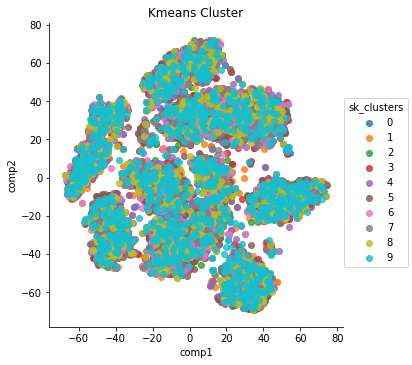

In [58]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='sk_clusters', fit_reg=False)
plt.title('Kmeans Cluster')

After visualizing the data we can see that the Kmeans cluster did not do a great job as seperating the images.

# D. Did you scale your data?

I scaled my data when I imported the data into the notebook by dividing X by 255. 

# E. How robust is your clustering?

my clustering was not accurate and very robust. It confused almost all the numbers with the different variants. 

# 4. Perform hierarchical clustering:

# A. Plot your dendrogram

Text(0.5,1,'Complete Linkage')

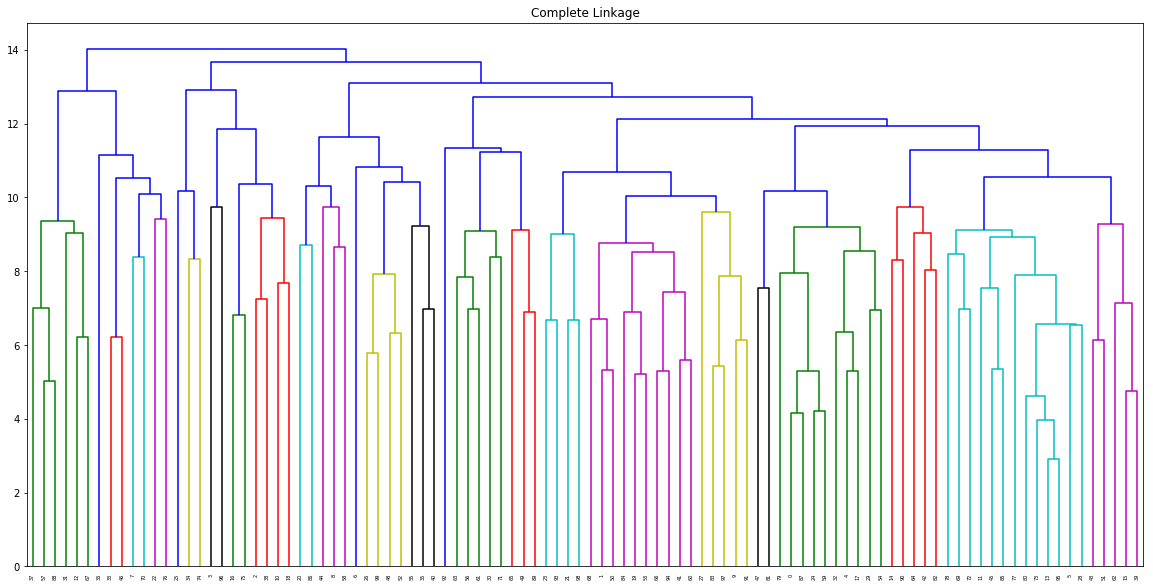

In [59]:
#plotting the dendogram
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'complete')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Complete Linkage')

I took a sample of the data, because when I tried to plot all 70,000 the graph was impossible to read. In my sample though I was sure to shuffle the data so that I wouldn't get the first 100 images.  

# B. How many clusters seem reasonable based off your graph?

Based on the dendogram it appears that 8 clusters would be reasonable when looking at this graph.

# C. How does your dendrogram change with different linkage methods?

I will plot dendograms with different linkage to see the differances if there are any.

Text(0.5,1,'Average Linkage')

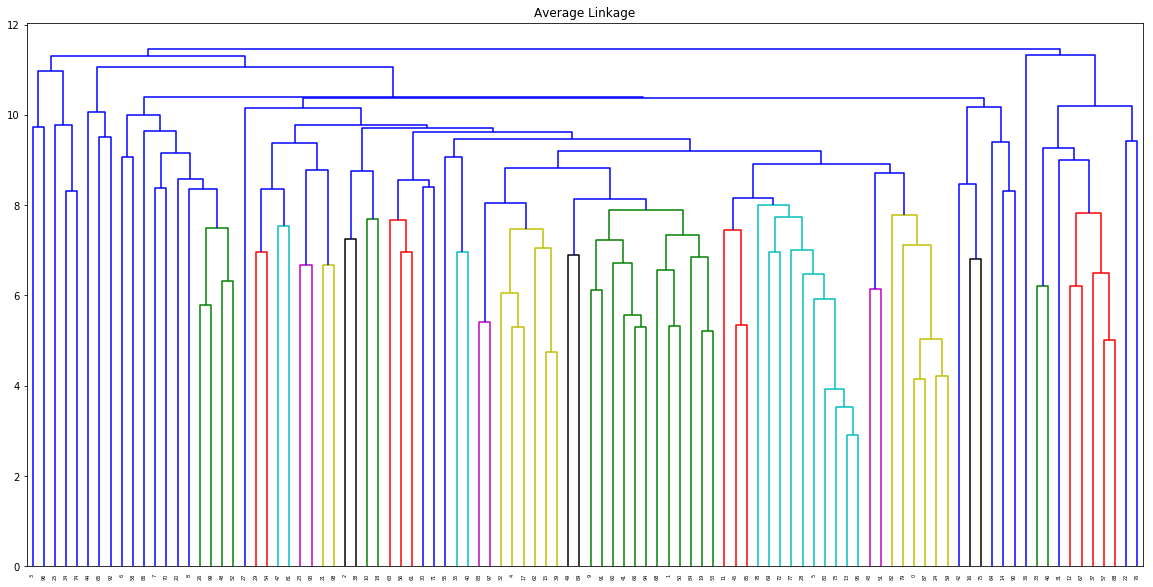

In [60]:
#using average
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'average')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Average Linkage')

Text(0.5,1,'Ward Linkage')

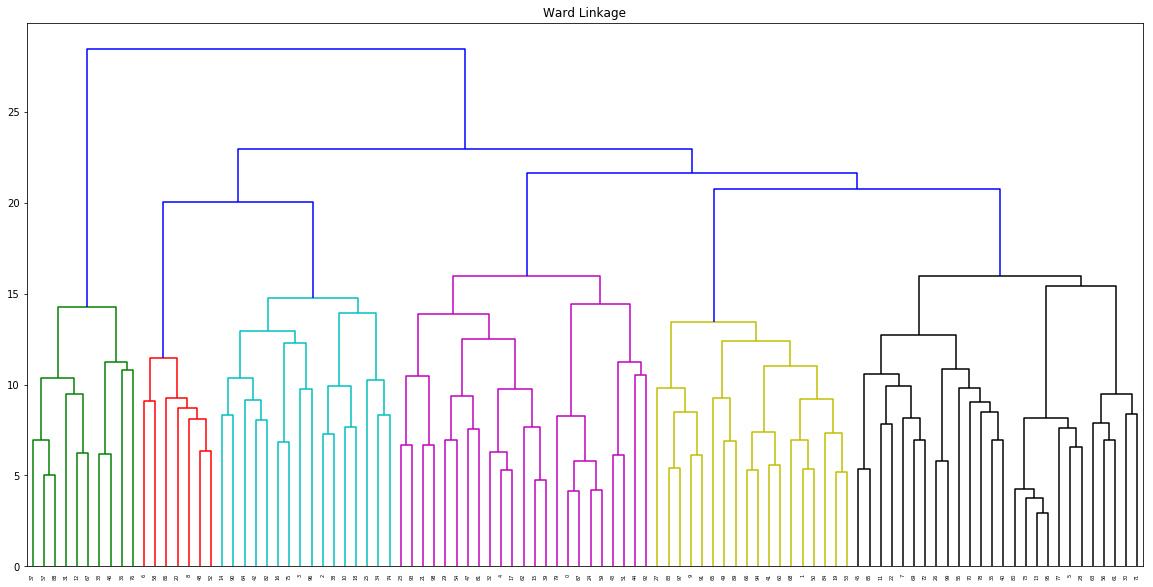

In [61]:
#using ward
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'ward')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Ward Linkage')

Text(0.5,1,'Single Linkage')

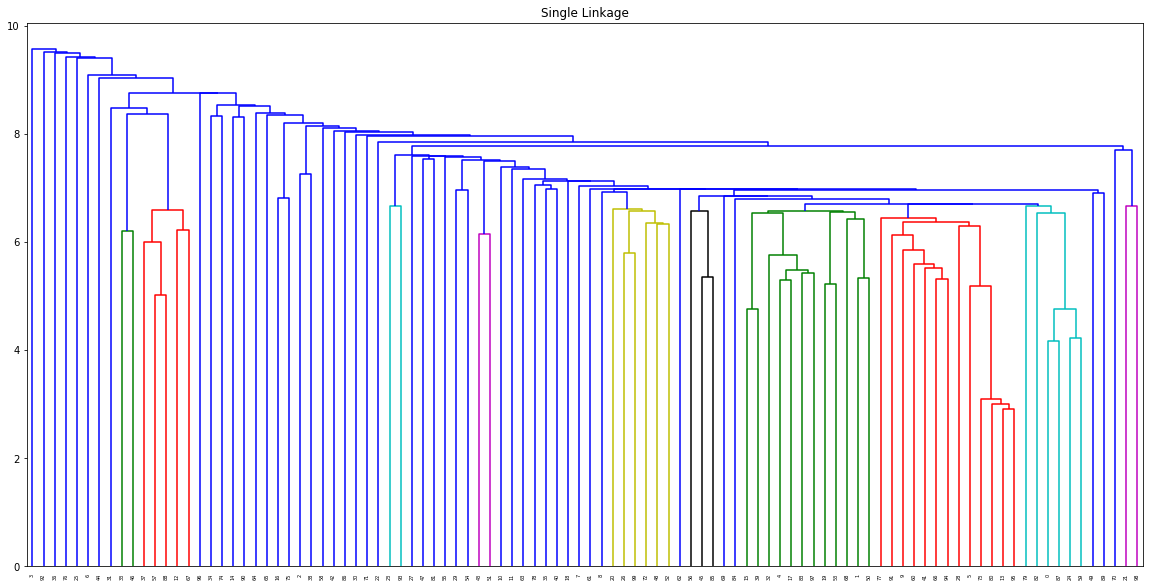

In [62]:
#using single
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'single')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Single Linkage')

Text(0.5,1,'Centroid Linkage')

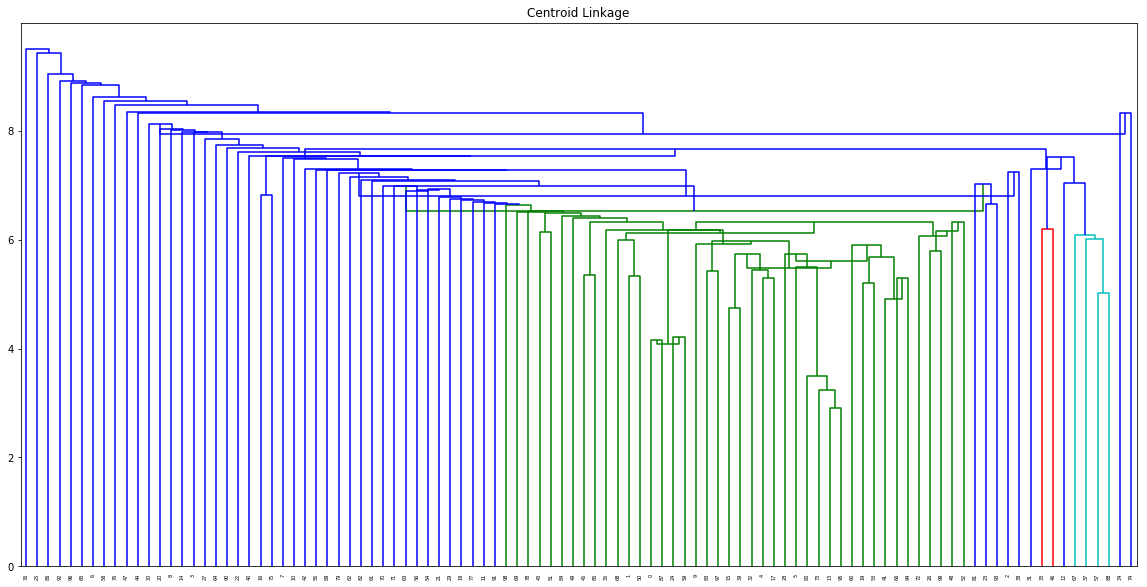

In [63]:
#using centroid
y = shuffle(X, random_state=0)
Z = linkage(y[0:100], 'centroid')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Centroid Linkage')

Based on the 5 different linkages the dendograms vary greatly. Out of the 5 dendograms "Ward" was the most sucessful linkage method. 